The dataset called ds_salaries.csv while searching for it i made sure it aligns aleast with the problem statement and also the employess are also shown their own salaries wiithin the dataset. ds_salaries provides comprehensive and relevant features such as 'salary', 'company_size' and the 'salary_in_usd', which are critical for finding out whether an employee is likely too withdraw funds from the accessible pot within the 12 months. This is the hyperlink where you can find the dataset (https://www.kaggle.com/code/viswabonam/eda-for-data-science-job-salaries/input).

In [29]:
import pandas as pd

In [30]:
 df = pd.read_csv('C:/Users/User/Downloads/ds_salaries.csv')

DATA PROCESSING AND CLEANING THE MISSING DATA

In [31]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [32]:
 df.size

41305

In [33]:
df.shape

(3755, 11)

In [34]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [35]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [36]:
df.describe

<bound method NDFrame.describe of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency

In [37]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

DATA VISUALISATION BEORE ENCODING AND TRAINING MODELS

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
categorical_columns = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size"]

In [45]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

BOXPLOT

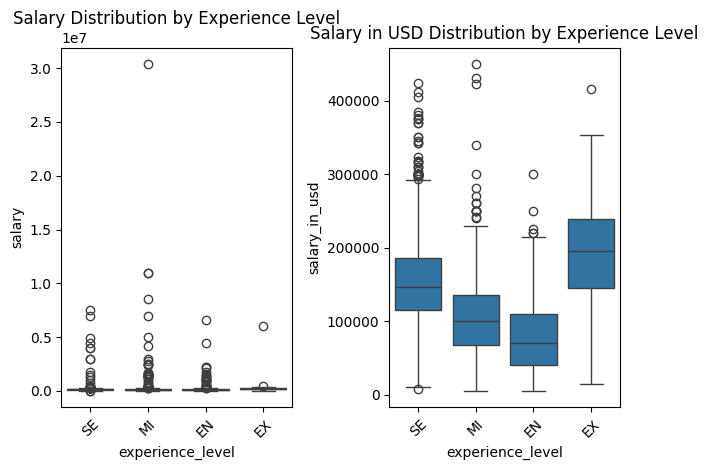

In [46]:
plt.subplot(1, 2, 1)
sns.boxplot(x = "experience_level", y = "salary", data=df)
plt.title("Salary Distribution by Experience Level")
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x = "experience_level", y = "salary_in_usd", data=df)
plt.title("Salary in USD Distribution by Experience Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

HISTOGRAM

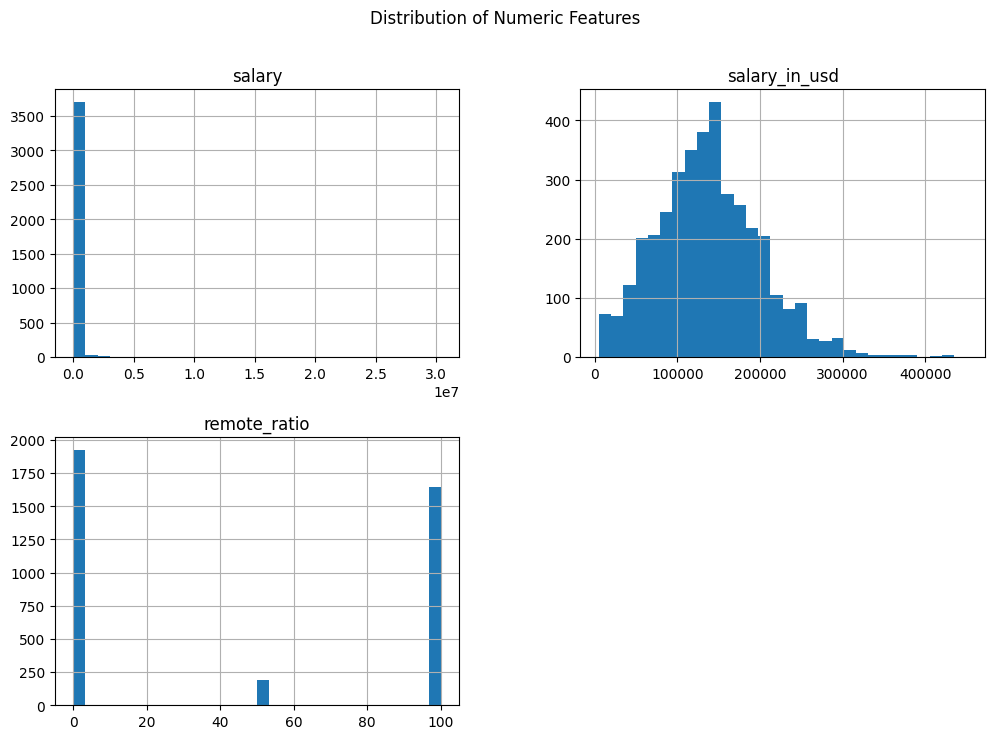

In [47]:
numeric_columns = ["salary", "salary_in_usd", "remote_ratio"]
df[numeric_columns].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Numeric Features")
plt.show()

NORMALIZATION is not a need when dealing with decision treees but it is also neccesary to check whether numerical values of my dataset are actually not out of range

In [48]:
df[['salary', 'salary_in_usd', 'remote_ratio']].describe()

,salary,salary_in_usd,remote_ratio
count,3.755000e+03,3755.000000,3755.000000
mean,1.906956e+05,137570.389880,46.271638
std,6.716765e+05,63055.625278,48.589050
min,6.000000e+03,5132.000000,0.000000
25%,1.000000e+05,95000.000000,0.000000
50%,1.380000e+05,135000.000000,0.000000
75%,1.800000e+05,175000.000000,100.000000
max,3.040000e+07,450000.000000,100.000000


data encoding the categorical features before use in machine learning models suing sklearn

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
label_encoders = {}
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

In [51]:
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [61]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_bin
0,2023,3,2,84,80000,EUR,85847,26,100,25,0,Medium
1,2023,2,0,66,30000,USD,30000,75,100,70,2,Low
2,2023,2,0,66,25500,USD,25500,75,100,70,2,Low
3,2023,3,2,47,175000,USD,175000,11,100,12,1,Very High
4,2023,3,2,47,120000,USD,120000,11,100,12,1,High


TRAINING AND TESTNG

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
df['salary_bin'] = pd.cut(df['salary_in_usd'], bins=[0, 50000, 100000, 150000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
y = df['salary_bin']
X = df.drop(columns=['salary_in_usd', 'salary_bin'])

In [115]:
X.dtypes
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
new_employee_data = pd.DataFrame({
    'work_year': [3],
    'experience_level': [1],
    'employment_type': [0],
    'job_title': [2],
    'salary': [60000],
    'salary_currency': [1],
    'employee_residence': [0],
    'remote_ratio': [50],
    'company_location': [1],
    'company_size': [0]
})

DECISION TREE

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [120]:
dt_predictions = dt_model.predict(X_test)

In [121]:
print("Decision Tree Classifier Performance:")
confusion_matrix(y_test, dt_predictions)
classification_report(y_test, dt_predictions)

Decision Tree Classifier Performance:


'              precision    recall  f1-score   support\n\n        High       0.98      0.98      0.98       268\n         Low       0.95      0.85      0.90        62\n      Medium       0.95      0.96      0.95       164\n   Very High       0.98      0.99      0.98       257\n\n    accuracy                           0.97       751\n   macro avg       0.96      0.95      0.95       751\nweighted avg       0.97      0.97      0.97       751\n'

testing the trained model on new data to see if the model can truly predict

In [125]:
dt_predictions = dt_model.predict(new_employee_data)
dt_probabilities = dt_model.predict_proba(new_employee_data)
print("Decision Tree Prediction:", dt_predictions, "Probabilities:", dt_probabilities)

Decision Tree Prediction: ['Medium'] Probabilities: [[0. 0. 1. 0.]]


This is our decision tree model working perfectly and is giving medium which means the employee has an equal likelihood of withdrawing funds.

RANDOM TREES

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [112]:
print("Random Forest Classifier Performance:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Performance:
[[263   0   4   1]
 [  0  57   5   0]
 [  2   6 155   1]
 [  1   1   0 255]]
              precision    recall  f1-score   support

        High       0.99      0.98      0.99       268
         Low       0.89      0.92      0.90        62
      Medium       0.95      0.95      0.95       164
   Very High       0.99      0.99      0.99       257

    accuracy                           0.97       751
   macro avg       0.95      0.96      0.96       751
weighted avg       0.97      0.97      0.97       751



testing the trained model on new data to see if the model can truly predict

In [126]:
rf_predictions = rf_model.predict(new_employee_data)
rf_probabilities = rf_model.predict_proba(new_employee_data)
print("Random Forest Prediction:", rf_predictions, "Probabilities:", rf_probabilities)

Random Forest Prediction: ['Low'] Probabilities: [[0.1  0.44 0.43 0.03]]


This model is showing low which means the employee is less likely to withdraw funds. 

LOGISTIC REGRESSION

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [79]:
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Logistic Regression Performance:


NameError: name 'lr_predictions' is not defined

our Model is 